<a href="https://colab.research.google.com/github/abegpatel/Fraud-detection-using-self-organizing-maps/blob/master/SOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SELF ORGANIZING MAPS-:
1.the intuition of SOMs
2.how to build a SOM
3.how to return the specific features(like frauds)detcted by SOM
4.how to make a hybrid deep learning model

.how do self organizing maps work
.k-means clustering
.SOMS(part1)
.SOMS(part2)
.live SOM example
.reading an advanced som


som is used for-reducing the dimension
eg..multidimensional ds-reduce the dimensionality(no of rows and no of colums)
`.how do work-i/p->make an map with a certain parameter->display the map with understandable features and a great visualization
.k-means->gruoup the features within a numbar of cluster based upon the similarities of the parameter
 how k-maeans intuition->1.choose  k no of cluster
                        2.select the random k ponits which is centriod
                        3.assign the dataponit to the closest centroid-that fom s k cluster using eculidian dis
                        4.compute the new centriod
                        5.reassign the data ponit to new coloseset centriod

 ** quick hack-make an line between two choosen centriod
  and above and below the data ponis are clostest to that dataponit resectively
stp 4 and stp5 repeat untill stopping criteria

input(3d)(soms)->output(2d)
no activation (weights are cordinates(w1,w2,w3)
i/p->{w1,w2,w3}->calculate the distances[sqrt((x1-w1)^2+(x2-w2)^2+(x3-w3)^2))]
    for every hidden layer
    eg.
    3 i/p layer and 10 hidden layer(every one connected to every node
 row 1-the closest distence is called bmu-best matching unit
 then closest node will updated the weights
 and all nodes are closest to bmu
 bum uses radius -according to its distance to the different node it will upadtaed covinently
 row no2-..
 row 3..
 ..
 ..
 random nodes are likely to be colur to the appereance/proprety of each bmu
each bmu has it won radius area
if 10 nodes are 10 bmu then ..all random nodes are aquire the shortest distance property from bmu
all 10 nodes are aciure the 10 bum properties colour
adv:
.retain trhe topology of the i/p
.revel the best co relation
.classify the data without supervision
.no target vector-no backpropagration
.no connection between the output nodes(no ann connection,no activation)



**`UCI machine learning labrotory(data set)`**

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Self_Organizing_Maps/Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset.head()


,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [ ]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

In [ ]:
pip install minisom

  Created wheel for minisom: filename=MiniSom-2.2.3-cp36-none-any.whl size=7550 sha256=49f1f2e38096aae925b01c2cf21955c4bc071e4b7c91125b86861595feb62031
  Stored in directory: /root/.cache/pip/wheels/35/62/79/4d921062c847ee15a3bb3ac2ea984ed401c8b6b2944f08f697
Successfully built minisom


In [ ]:
# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)



MID-MEAN INTERNEURON DISTANCE:
higher mid->more wining node are outlier

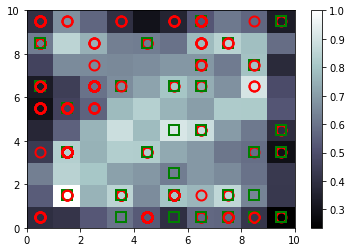

In [ ]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [ ]:
# Finding the frauds
mappings = som.win_map(X)


In [ ]:
frauds = np.concatenate((mappings[(8,1)], mappings[(6,8)]), axis = 0)


In [ ]:
frauds.reshape(-1,1)

array([[6.33366569e-01],
       [1.00000000e+00],
       [3.38345865e-01],
       [1.78571429e-01],
       [5.00000000e-01],
       [5.38461538e-01],
       [5.00000000e-01],
       [8.77192982e-02],
       [1.00000000e+00],
       [1.00000000e+00],
       [8.95522388e-02],
       [0.00000000e+00],
       [5.00000000e-01],
       [0.00000000e+00],
       [3.67000000e-03],
       [4.96806538e-01],
       [1.00000000e+00],
       [3.83458647e-01],
       [3.39285714e-01],
       [5.00000000e-01],
       [4.61538462e-01],
       [3.75000000e-01],
       [2.28070175e-01],
       [1.00000000e+00],
       [1.00000000e+00],
       [2.08955224e-01],
       [0.00000000e+00],
       [5.00000000e-01],
       [1.20000000e-01],
       [4.60700000e-02],
       [6.81230454e-01],
       [1.00000000e+00],
       [5.82706767e-01],
       [2.32142857e-01],
       [5.00000000e-01],
       [2.30769231e-01],
       [3.75000000e-01],
       [2.20701754e-01],
       [1.00000000e+00],
       [1.00000000e+00],


In [ ]:
frauds = sc.inverse_transform(frauds)


In [ ]:
frauds

array([[3.92672539e+12, 1.00000000e+00, 2.42437500e+03, 1.40000000e+02,
        5.00000000e+00, 1.05000000e+02, 4.10000000e+01, 7.12500000e+01,
        1.00000000e+00, 1.00000000e+00, 4.02000000e+02, 0.00000000e+00,
        5.00000000e+00, 0.00000000e+00, 3.68000010e+07],
       [3.91820889e+12, 1.00000000e+00, 2.62387500e+03, 2.66000000e+02,
        5.00000000e+00, 9.20000000e+01, 3.30000000e+01, 1.85250000e+02,
        1.00000000e+00, 1.00000000e+00, 9.38000000e+02, 0.00000000e+00,
        5.00000000e+00, 4.80000000e+05, 4.60800001e+08],
       [3.92971040e+12, 1.00000000e+00, 3.50500000e+03, 1.82000000e+02,
        5.00000000e+00, 5.30000000e+01, 3.30000000e+01, 1.79265000e+02,
        1.00000000e+00, 1.00000000e+00, 1.00500000e+03, 0.00000000e+00,
        5.00000000e+00, 0.00000000e+00, 1.12030000e+09],
       [3.94031215e+12, 1.00000000e+00, 1.67625000e+03, 3.15000000e+02,
        5.00000000e+00, 1.05000000e+02, 3.30000000e+01, 7.12500000e+01,
        1.00000000e+00, 1.00000000e+0